# Mall Customer Data


# About Dataset

Context

This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . 

Content

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

Problem Statement

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

# Importing Libraries

In [1]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model
from sklearn.preprocessing import LabelEncoder  # to convert object into int


from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [9]:
data=pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Observation:-

1)To classify / cluster Mall Customers based on numerical and categorical features.
2) It is an Unsupervised Learning problem statement as it have no target variable.
3) # Dataset Attributes
CustomerID : Unique ID assigned to the customer
Gender : Gender of the customer
Age : Age of the customer
Annual Income (k$) : Annual Income of the customer
Spending Score (1-1000) : Score assigned by the mall based on customer behavior and spending nature

# Dimensions of Dataset

In [3]:
# check the no. of rows & column & finding the count of missing value
print(data.shape)
print(data.isna().sum())
#printing the summary of data type
data.info() 

(200, 5)
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
#first remove duplicates & recheck the size
data.drop_duplicates(inplace=True)

print(data.shape)

(200, 5)


As we seen there is no null values as well as no duplicates found so lets move further.

# Statistical Summary

In [5]:
# Lets understand data at high level check the stastics of dataset
data.describe(include='all')

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


# Data Visualization

# Univariate Plots

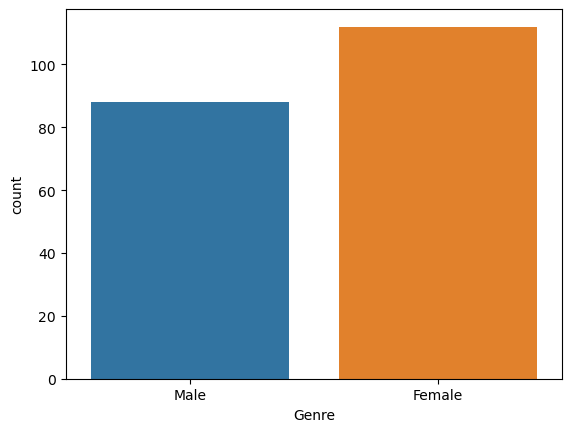

Male       88
Female    112
Name: Genre, dtype: int64


In [7]:
#plot each class frequency
sns.countplot(x='Genre',data=data)
plt.show()
print(data['Genre'].value_counts(ascending=True))

From Graph we can see there are more female customers are there.

In [10]:
# as we have Gender is Objective type column lets convert them into intiger
data['Genre']=[0 if x=='Female' else 1 for x in data['Genre']]
data['Genre'].value_counts()

0    112
1     88
Name: Genre, dtype: int64

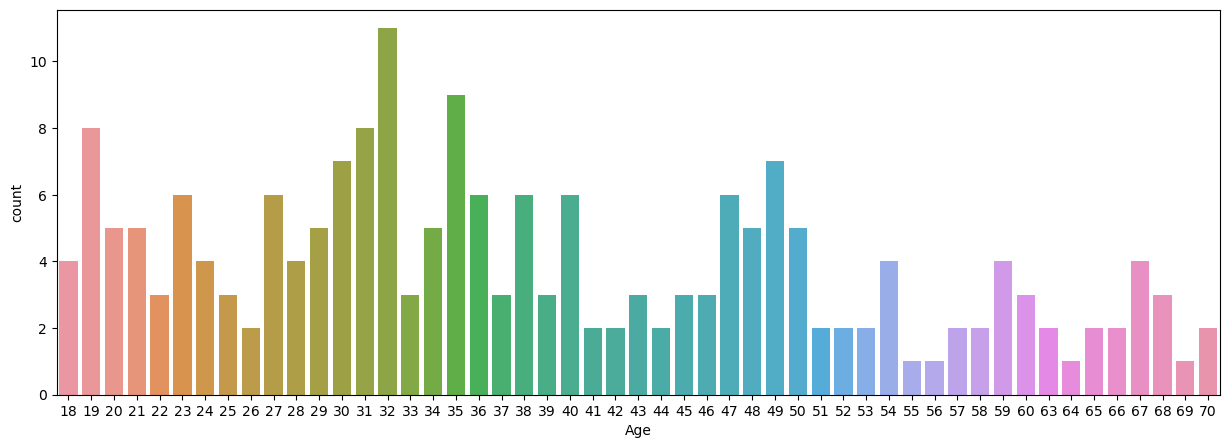

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Age, dtype: int64


In [11]:
#plot each class frequency
plt.figure(figsize=(15,5))
sns.countplot(x='Age',data=data)
plt.show()
print(data['Age'].value_counts())

From Graph we can see that there are age group from 18 to 70.

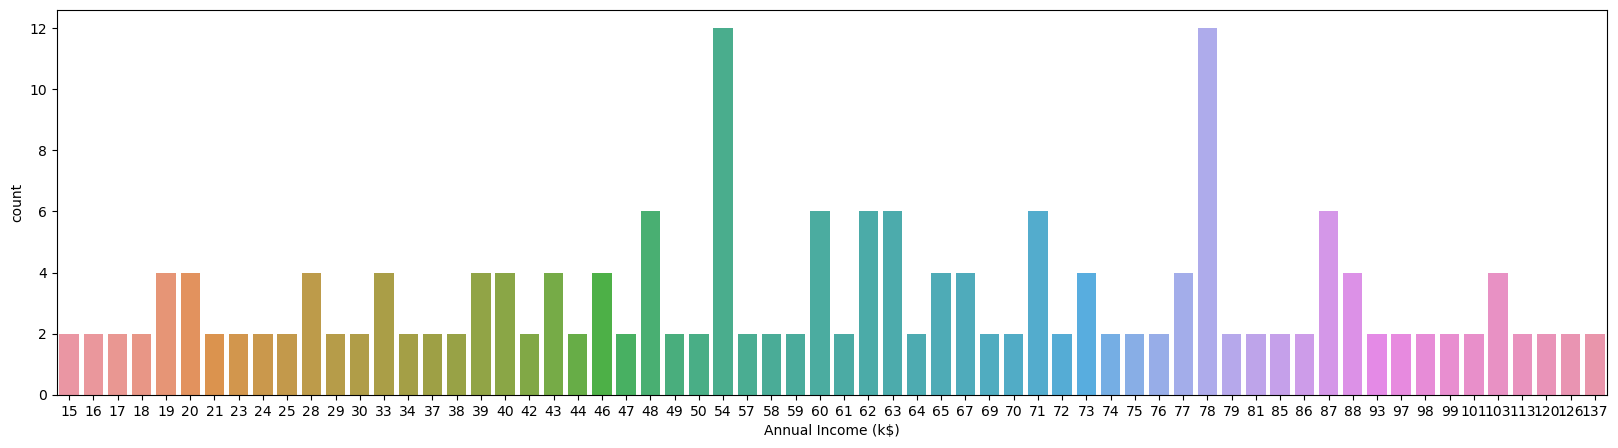

54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Annual Income (k$), Length: 64, dtype: int64


In [12]:
#plot each class frequency
plt.figure(figsize=(20,5))
sns.countplot(x='Annual Income (k$)',data=data)
plt.show()
print(data['Annual Income (k$)'].value_counts())

So from graph we can see the minimum annual income is 15k$ to 137k$.

# Bivarinate Graph

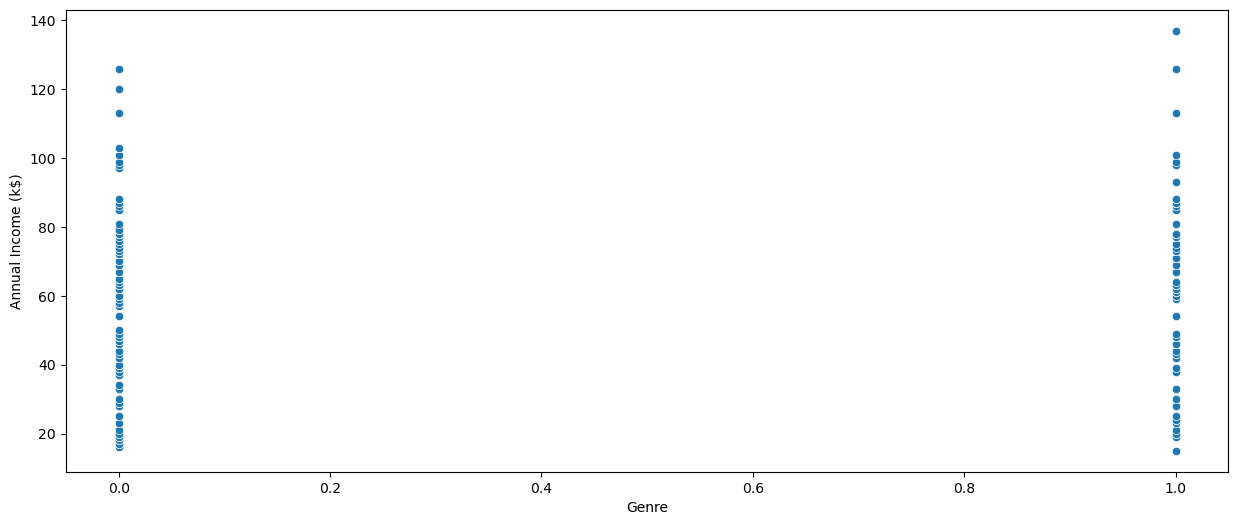

In [14]:
#Bivariant graph
plt.figure(figsize =(15,6))
sns.scatterplot(y ='Annual Income (k$)', x ='Genre', data = data)
plt.show()

from grapf we can see the annual income for female is more than the male.

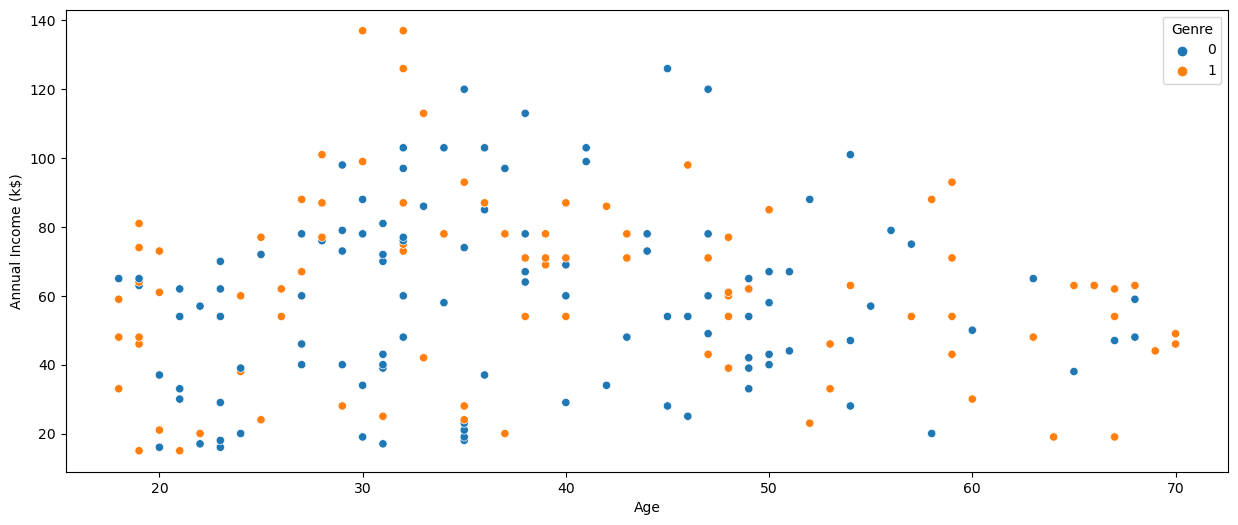

In [43]:
#Bivariant graph
plt.figure(figsize =(15,6))
sns.scatterplot(y ='Annual Income (k$)', x ='Age', data = data, hue='Genre')
plt.show()

From Graph we can see the Annual income is more the age group between 29 to 35

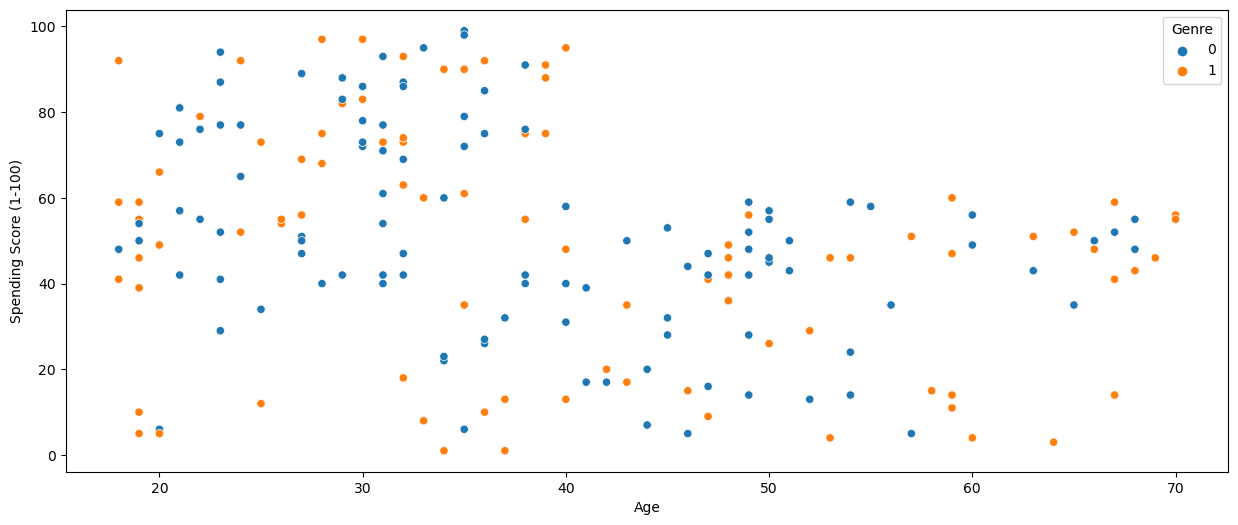

In [42]:
#Bivariant graph
plt.figure(figsize =(15,6))
sns.scatterplot(y ='Spending Score (1-100)', x ='Age', data = data, hue='Genre')
plt.show()

WE can see the Spending Score (1-100)is more in age group between 20 to 40 and it will dedcresing towords age.

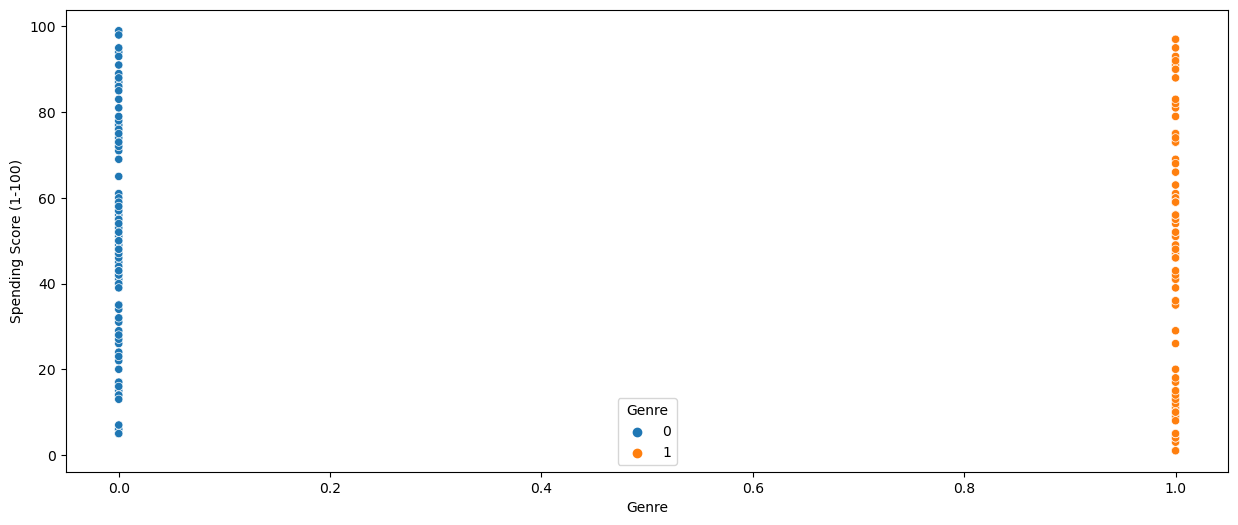

In [41]:
#Bivariant graph
plt.figure(figsize =(15,6))
sns.scatterplot(y ='Spending Score (1-100)', x ='Genre', data = data,hue='Genre')
plt.show()

spending score for the men and women is same.

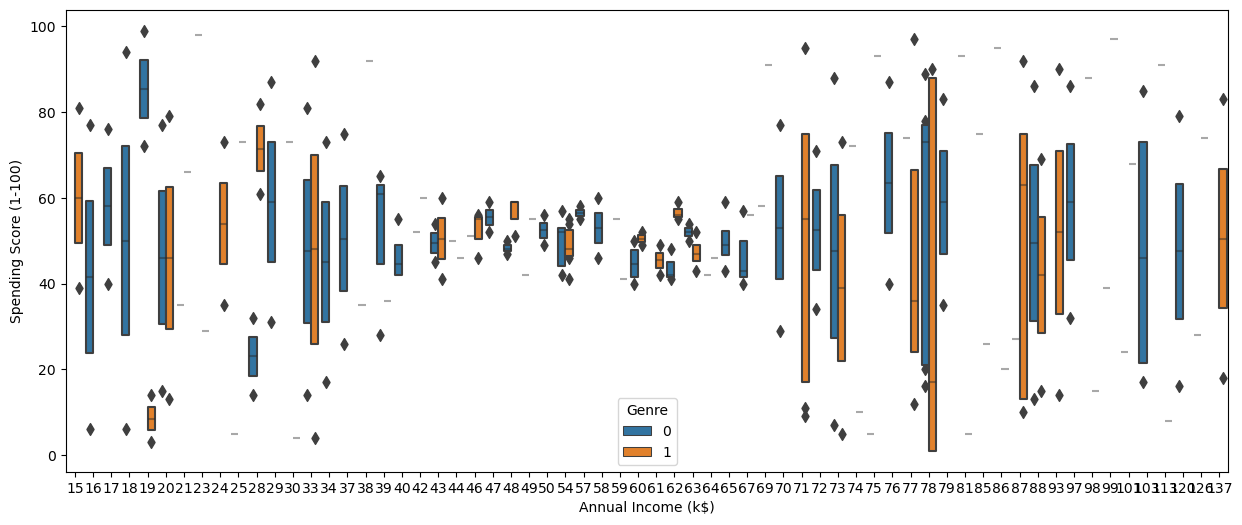

In [40]:
#Bivariant graph
plt.figure(figsize =(15,6))
sns.boxenplot(y ='Spending Score (1-100)', x ='Annual Income (k$)', data = data,hue="Genre")
plt.show()

From graph we can see the spending score for annual income between 40k$  to  almost  70k$ is steady and then again it will shout up.

# Lets Seaprate the Data set for using the Clustering techniqes.

In [38]:
x=data.drop(columns=['CustomerID','Genre', 'Age'])
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


# 1) Kmeans Clustering

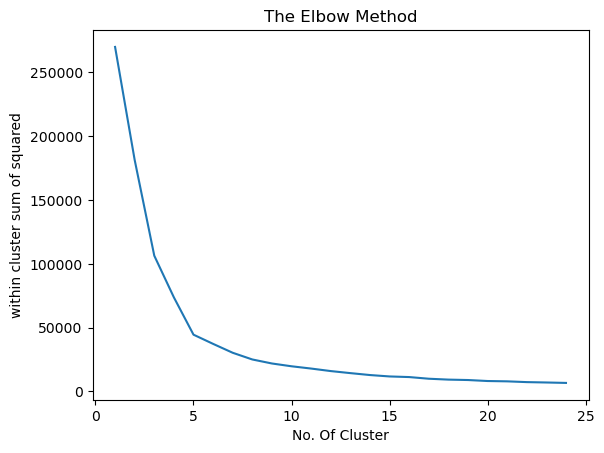

In [39]:
# Elbow Method to find the no of cluster 
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,25):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,25),wcss)
plt.title('The Elbow Method')
plt.xlabel('No. Of Cluster')
plt.ylabel('within cluster sum of squared')# or Inclined distance or inertia
plt.show()

From graph we can see the 6 no has minimum intertia or we can say a stable intertia between 6 to further ie 7,8,9, 10 etc. SO, i am selecting 6 no. of clusters.

In [44]:
#Fitting kmeans to the dataset with selected cluster 
kmeans=KMeans(n_clusters=6, random_state=4,max_iter=3000)
y_kmeans=kmeans.fit_predict(x)
y_kmeans


array([2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 4, 5, 0, 5, 4, 5, 4, 5,
       0, 5, 4, 5, 4, 5, 4, 5, 4, 5, 0, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3])

So, lets interpreate the above prediction 1) if gender is 1 age is 19 annual income is 15 and spending score is 39 then they belongs to cluster no.4 and so on.

In [45]:
x.head(5)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# Model Evaluation 

In [46]:
# Lets check how our clusters are well definded or our model is created well or not in terms of percentage.
from sklearn.metrics import silhouette_score
silhouette_score(x,y_kmeans)

0.5379675585622219

As we have very less dataset just 200 datapoints so the accuracy is low. For better accuracy we need suffient datapoints.

In [47]:
# Lets check if our model is predicted right or not. It predict the cluster no to which data point belongs to 
test= kmeans.predict(np.asarray([[17,40]]))
test[0]

2

So we can see the value predicted correctly.

# Visualisation of cluster 

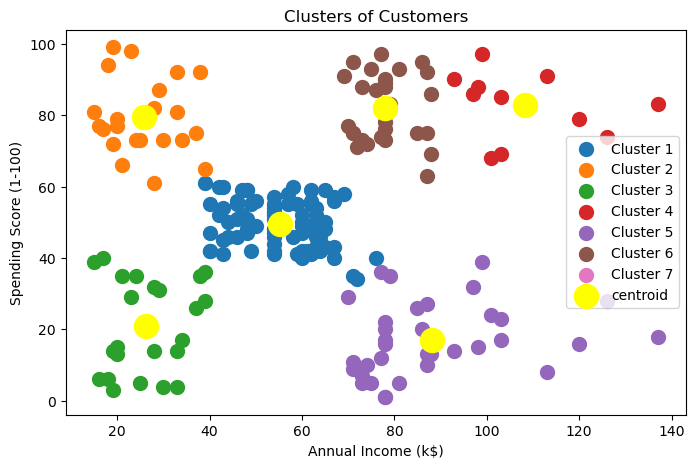

In [49]:
# Visualisation of cluster 
plt.figure(figsize=(8,5))
plt.scatter(x[y_kmeans==0]['Annual Income (k$)'],x[y_kmeans==0]['Spending Score (1-100)'],s=100, label='Cluster 1')
plt.scatter(x[y_kmeans==1]['Annual Income (k$)'],x[y_kmeans==1]['Spending Score (1-100)'],s=100,label='Cluster 2')
plt.scatter(x[y_kmeans==2]['Annual Income (k$)'],x[y_kmeans==2]['Spending Score (1-100)'],s=100,label='Cluster 3')
plt.scatter(x[y_kmeans==3]['Annual Income (k$)'],x[y_kmeans==3]['Spending Score (1-100)'],s=100,label='Cluster 4')
plt.scatter(x[y_kmeans==4]['Annual Income (k$)'],x[y_kmeans==4]['Spending Score (1-100)'],s=100,label='Cluster 5')
plt.scatter(x[y_kmeans==5]['Annual Income (k$)'],x[y_kmeans==5]['Spending Score (1-100)'],s=100,label='Cluster 6')
plt.scatter(x[y_kmeans==6]['Annual Income (k$)'],x[y_kmeans==6]['Spending Score (1-100)'],s=100,label='Cluster 7')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300, c='yellow',label='centroid')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()
plt.show()

In [50]:
kmeans.cluster_centers_

array([[ 55.2962963 ,  49.51851852],
       [ 25.72727273,  79.36363636],
       [ 26.30434783,  20.91304348],
       [108.18181818,  82.72727273],
       [ 88.2       ,  17.11428571],
       [ 78.03571429,  81.89285714]])

In [51]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# 2) Hierarchical clustering

In [53]:
x_hirarchy=data.drop(columns=['CustomerID', 'Genre', 'Age'])
x_hirarchy

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Hierarchical clustering is a type of unsupervised machine learning technique used for grouping similar data points together in a hierarchical manner. Here's a brief explanation:

Start: Initially, each data point is considered as an individual cluster.

Merge: Similar clusters are progressively merged based on their similarity or dissimilarity, creating a tree-like structure called a dendrogram.

Dendrogram: The dendrogram visually represents the merging process, showing how data points or clusters are grouped together at different levels of similarity.

Hierarchical structure: As clusters merge, they form larger clusters, and this process continues until all data points belong to a single cluster or are grouped according to the desired level of similarity.

Choosing the number of clusters: The final clusters are determined by "cutting" the dendrogram at a specific level, which corresponds to the desired number of clusters.

Hierarchical clustering is powerful because it provides a visual representation of the relationships between data points and allows for exploring different clustering solutions at various levels of granularity. It is commonly used in data exploration, pattern recognition, and in some cases, even as a preprocessing step for other algorithms.

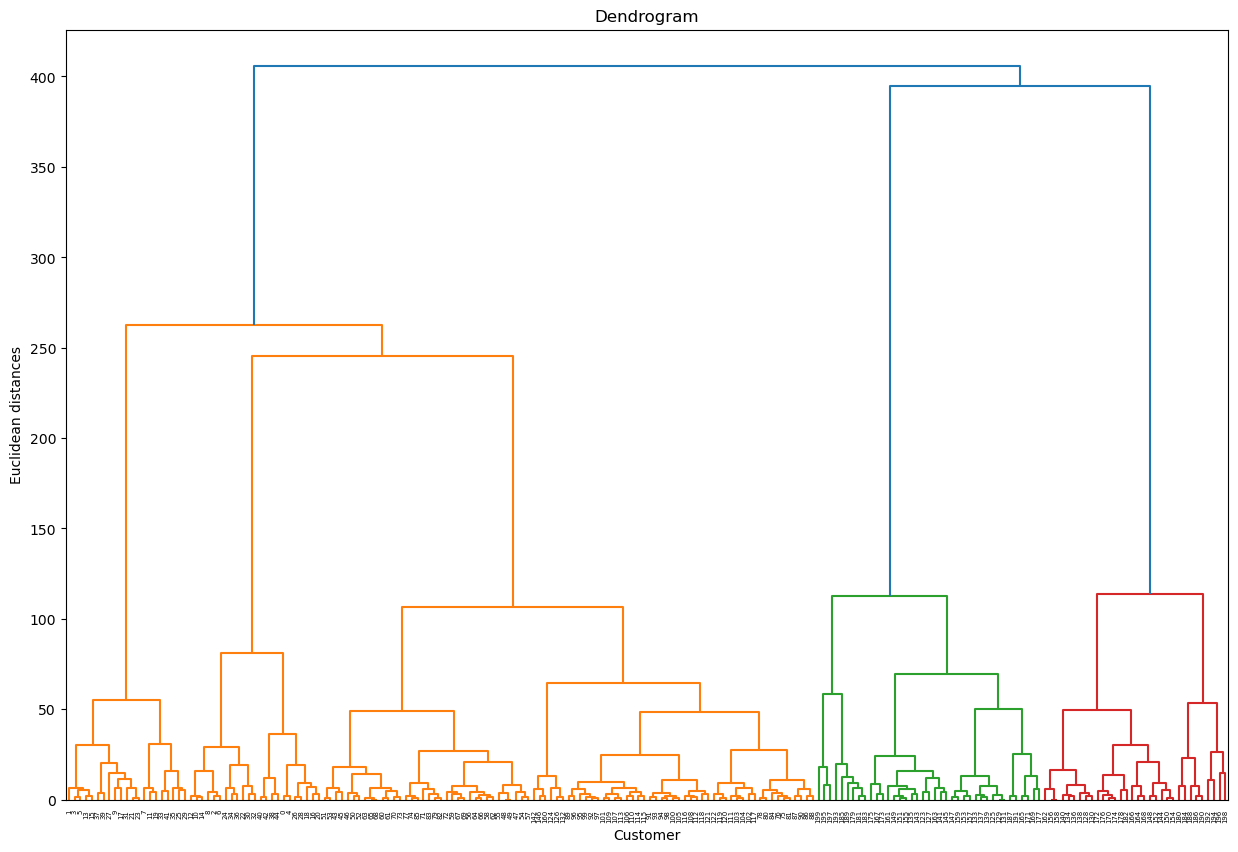

In [63]:
# Lets Plot the Dentogram to select the cluster 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(15,10))
dendrogram=dendrogram(linkage(x_hirarchy,"ward"))
plt.title("Dendrogram")
plt.xlabel("Customer")
plt.ylabel("Euclidean distances")
plt.show()

From graph we can see the no of cluster based on enclined distance SO, i am selecting 11 no. of clusters.

Interpreting a dendrogram involves understanding the hierarchical relationships among data points in a dataset. A dendrogram is a tree-like diagram used in hierarchical clustering to represent the arrangement of data points based on their similarity or dissimilarity. Here's a step-by-step guide on how to interpret a dendrogram:

Understanding the Y-axis: The Y-axis of the dendrogram represents the dissimilarity or distance between data points. The closer the data points are on the Y-axis, the more similar they are to each other.

Identifying clusters: Each data point is initially considered as an individual cluster. As you move up the dendrogram, clusters start to merge, forming larger clusters. The vertical lines in the dendrogram represent these merging points.

Horizontal lines: The length of the horizontal lines connecting clusters or data points represents the distance at which the merging occurred. Longer lines indicate that clusters or data points were farther apart in terms of dissimilarity when they merged.

Cluster height: The height at which two clusters merge is an indicator of their similarity. Lower height indicates that the clusters are very similar, while higher height suggests more dissimilarity.

Cutting the dendrogram: To form distinct clusters, you can cut the dendrogram horizontally at a certain height. The number of resulting clusters depends on the number of horizontal lines you intersect. Each cluster will contain the data points or smaller clusters that were merged at or above the cutting height.

Determining cluster membership: By analyzing the branches of the dendrogram below the cutting height, you can identify which data points or clusters belong to each formed cluster.

Choosing the cutoff height: The choice of cutoff height for clustering depends on your specific application and the level of granularity you want in your clusters. A higher cutoff will yield fewer, larger clusters, while a lower cutoff will create more, smaller clusters.

In [78]:
# Lets Build the Clusters 
Hirerchy_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(x_hirarchy)
y_Hirerchy_cluster=Hirerchy_clustering.fit_predict(x_hirarchy)
y_Hirerchy_cluster


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

# Model Evaluation 

In [79]:
# Lets check how our clusters are well definded or our model is created well or not in terms of percentage.
from sklearn.metrics import silhouette_score
silhouette_score(x_hirarchy,y_Hirerchy_cluster)

0.5529945955148897

In [82]:
x_hirarchy.head(2)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81


# Visualisation of cluster

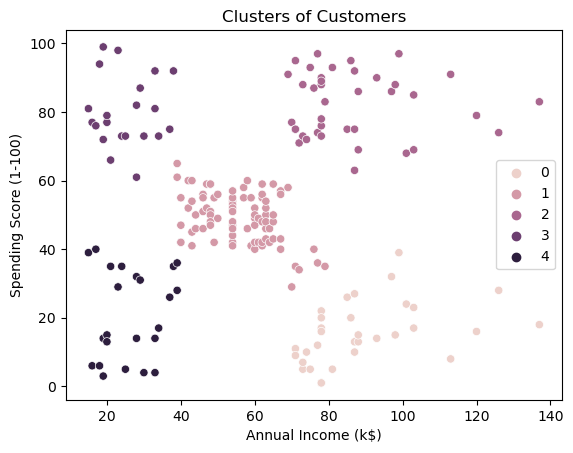

In [94]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue=Hirerchy_clustering.labels_,data=x_hirarchy)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()
plt.show()

In [99]:
# Lets Create the custor column in same data set 
data['Cluster']=y_Hirerchy_cluster

In [112]:
#Lets Save the individual cluster for further analysis
cl1=data[y_Hirerchy_cluster==0]
cl2=data[y_Hirerchy_cluster==2]
print(cl1.head(2), '\n', '*'*100, '\n', cl2.head(2))

     CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
128         129      1   59                  71                      11   
130         131      1   47                  71                       9   

     Cluster  
128        0  
130        0   
 **************************************************************************************************** 
      CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
123         124      1   39                  69                      91   
125         126      0   31                  70                      77   

     Cluster  
123        2  
125        2  
